# VAISNAV ROY
# Task 1
# Simple Linear Regression
Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:

-    One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
-    The other variable, denoted y, is regarded as the response, outcome, or dependent variable.


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

- Importing the data from the provided url into a pandas dataframe.

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


- In order to get a better understanding of the Hours of study and Percentage received by each student let us plot the given data into a 2D plot using the matplotlib.pyplot function

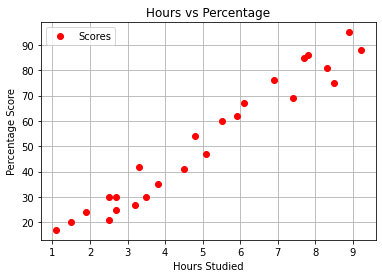

In [15]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='ro')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid(True)
plt.show()

# Preparing the data

In [20]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values 

# Training the model using Stochastic Gradient Descent Regressor

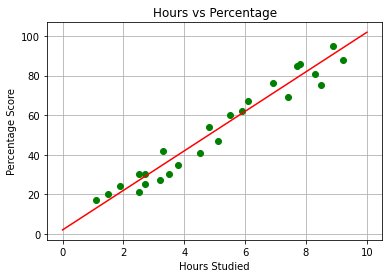

In [33]:
from sklearn.linear_model import SGDRegressor
#create and fit the model
model=SGDRegressor(loss="squared_loss",max_iter=1000,random_state=1)
model.fit(X,Y)#(2dim,1dim)


plt.figure()
plt.title('Hours vs Percentage')
plt.plot(X,Y,'go')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.plot([0,10],[model.predict([[0]])[0],model.predict([[10]])[0]],color='r')
plt.grid(True)
plt.show()

## Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.
In order to compare the predictions with the already loaded data we have divided the data into train and test set.


In [41]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual,Predicted
0,20,16.971734
1,27,33.957433
2,69,75.922101
3,30,26.963322
4,62,60.934719


In [42]:
# You can also test with your own data
hours = 9.25
own_pred = model.predict([[9.25]])
print("No of Hours = {}".format(9.25))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 94.40653746311624


# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.


## Calculating Mean Squarred Error

In [43]:
from  sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,model.predict(X),multioutput="uniform_average")
print("SGD MSE--->",mse)

SGD MSE---> 29.506688610182792


## Calculating the score of the linear regressor model.

In [40]:
print("The score of the model is :")
print(model.score(X,Y))


The score of the model is :
0.9519317295145541
